# 16 Cyg B

Using p-mode frequencies determined in Lund et al. (2017).

In [1]:
import numpy as np
import asterion as ast
from asterion import GlitchModel, Inference
import matplotlib.pyplot as plt

ast.style.use("asterion-light")

In [2]:
# Lund et al. (2017)
nu_max = (2561.3, 5.6)  # in microhertz
delta_nu = (116.93, 0.01)   # in microhertz
teff = (5750, 50)    # in Kelvin

In [3]:
from astroquery.vizier import Vizier

In [4]:
v = Vizier(row_limit=-1)
tables = v.query_constraints("J/ApJ/835/172/table6", KIC="12069449")

In [5]:
df = tables[0].to_pandas()
df.head()

,KIC,n,l,Freq,e_Freq,E_Freq,Amp,e_Amp,E_Amp,Width,e_Width,E_Width,l_lnK,lnK
0,12069449,12,1,1631.08775,0.32270,0.24983,NaN,NaN,NaN,NaN,NaN,NaN,>,6.00
1,12069449,12,2,1685.79351,0.67812,0.64913,NaN,NaN,NaN,NaN,NaN,NaN,,0.22
2,12069449,13,0,1695.02292,0.14096,0.11055,0.73112,0.07429,0.08802,0.61963,0.268,0.49266,>,6.00
3,12069449,13,1,1749.25334,0.20052,0.16636,NaN,NaN,NaN,NaN,NaN,NaN,>,6.00
4,12069449,13,2,1804.24339,0.53821,0.63535,NaN,NaN,NaN,NaN,NaN,NaN,,0.78


In [6]:
mask = df["l"] == 0  # radial orders only
n = df.loc[mask, "n"].to_numpy()
nu, nu_low, nu_high = df.loc[mask, ["Freq", "e_Freq", "E_Freq"]].to_numpy().T

In [7]:
nu_err = np.stack([nu_low, nu_high]).max(axis=0)

In [8]:
model = GlitchModel(nu_max, delta_nu, teff=teff)

In [9]:
infer = Inference(model, n=n, nu=nu, nu_err=nu_err, seed=10)
infer.prior_predictive()  # <-- check prior is sensible
prior_data = infer.get_data()

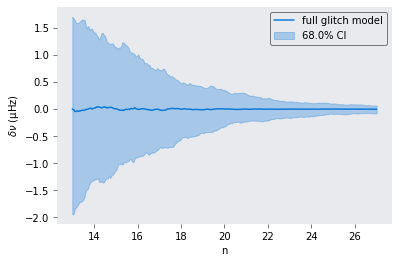

In [10]:
ast.plot_glitch(prior_data, group='prior');

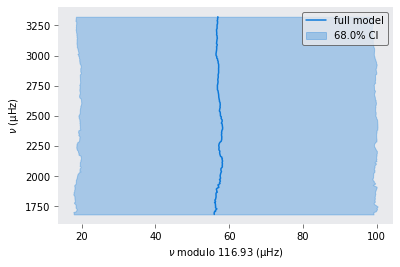

In [11]:
ast.plot_echelle(prior_data, group='prior');

In [12]:
infer.sample()
infer.posterior_predictive()
data = infer.get_data()

Running nested sampling using the 'multi_ellipsoid' sampler with 50 live points and 50000 maximum samples...


/Users/grd/Repos/matriculate/matriculate_env/lib/python3.9/site-packages/jaxns/nested_sampling.py:293: FutureWarning: jax.tree_map is deprecated, and will be removed in a future release. Use jax.tree_util.tree_map instead.
  x_dead_new = tree_map(lambda x: x[i_min], state.live_points_X)
/Users/grd/Repos/matriculate/matriculate_env/lib/python3.9/site-packages/jaxns/nested_sampling.py:550: FutureWarning: jax.tree_multimap is deprecated, and will be removed in a future release. Use jax.tree_util.tree_multimap instead.
  live_points_U = tree_multimap(
/Users/grd/Repos/matriculate/matriculate_env/lib/python3.9/site-packages/jax/_src/tree_util.py:205: FutureWarning: jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() instead as a drop-in replacement.
  warnings.warn('jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() '
/Users/grd/Repos/matriculate/matriculate_env/lib/python3.9/site-packages/jaxns/nested_sampling.py:553: FutureWarning

Completed in 18.6 seconds.


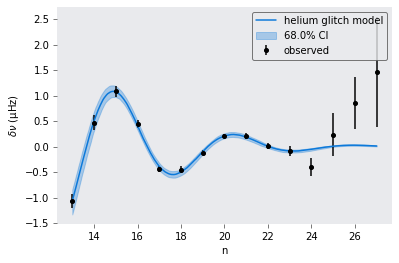

In [13]:
ast.plot_glitch(data, kind='He');

(-0.1, 0.1)

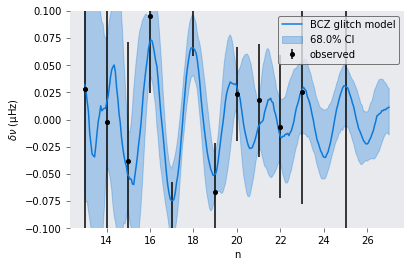

In [14]:
ax = ast.plot_glitch(data, kind='CZ')
ax.set_ylim(-0.1, 0.1)

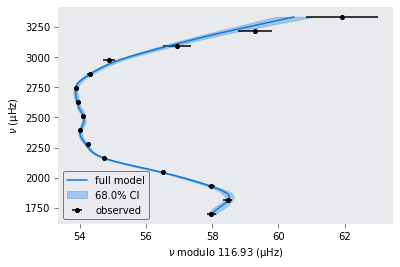

In [15]:
ast.plot_echelle(data);

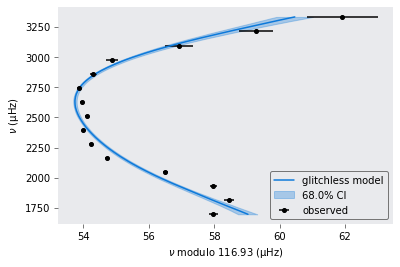

In [16]:
ast.plot_echelle(data, kind='glitchless');

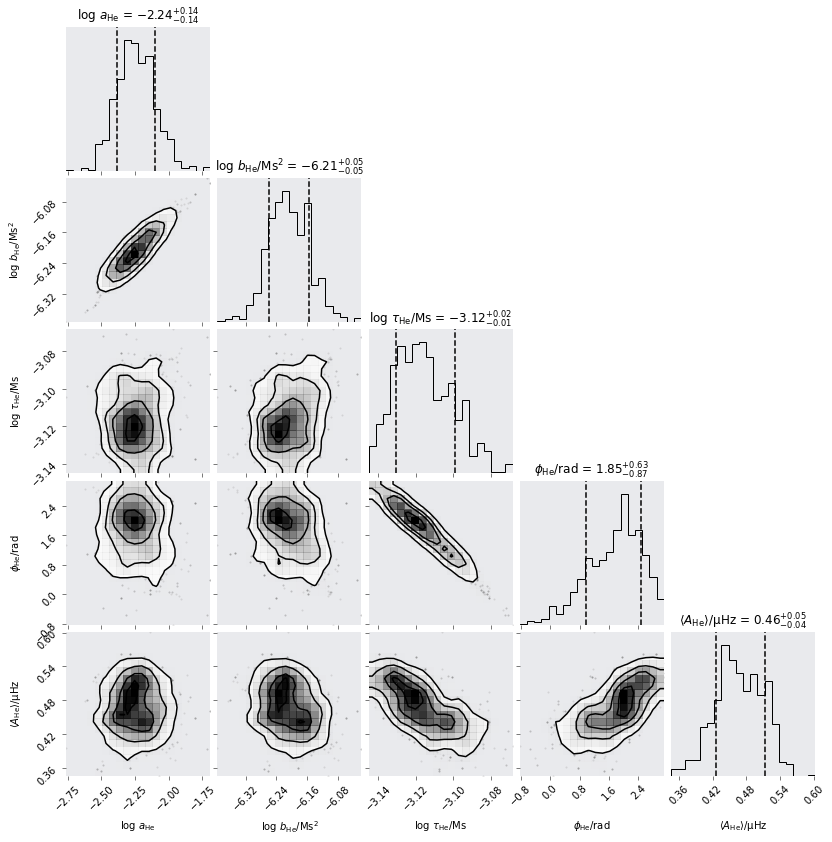

In [17]:
ast.plot_corner(data, var_names=['log_a_he', 'log_b_he', 'log_tau_he', 'phi_he', 'he_amplitude']);

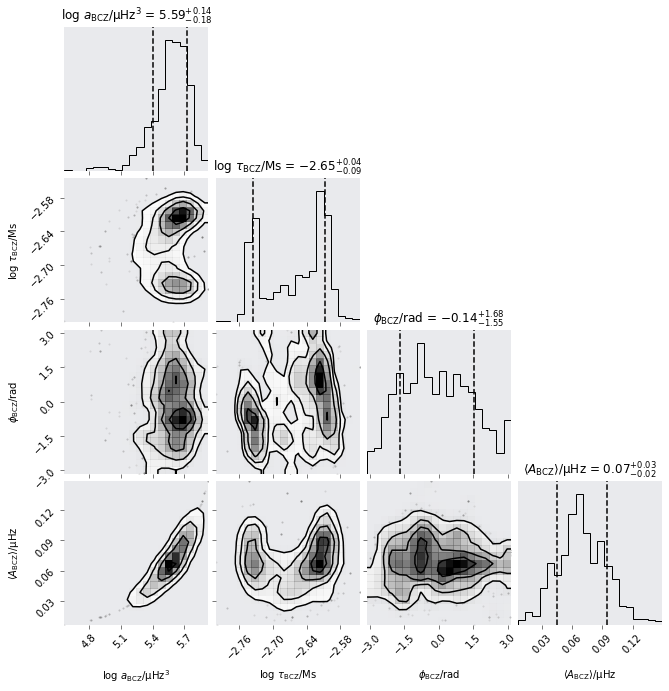

In [18]:
ast.plot_corner(data, var_names=['log_a_cz', 'log_tau_cz', 'phi_cz', 'cz_amplitude']);